### 1. 请将模拟数据替换为Figure 7所需数据

既然这四款LLM在我们的任务上表现是高度可比的，那么最能代表这项任务性能的，就不是任何**单一**LLM的结果，而是它们表现的**平均值**。

**具体做法如下：**

1.  **计算平均性能**: 对于图中的每一条曲线上的每一个数据点，都计算它在**所有四个LLM上的平均值**。例如，对于iTrust数据集上`Requirements(zero-shot)`策略的F1分数，我们不再单独展示Claude 3, Gemini, GPT-3.5, GPT-4o各自的值，而是计算这四个值的**平均数**。

2.  **计算标准差**: 同时，计算这四个值的**标准差 (Standard Deviation)**。这个标准差非常重要，它量化了不同LLM之间性能的**波动范围**。

3.  **绘制新的、唯一的图表**:
    * 采纳**分组柱状图**，只为主指标（如F1和F2）绘图。
    * 图表的横轴是四个数据集（EBT, eTOUR, iTrust, RETRO）。
    * 在每个数据集下，并排**放置5根柱子**，代表五种策略。
    * **柱子的高度**：现在不再是任何单一LLM的性能，而是该策略在该数据集上的**平均性能**。
    * **增加误差棒 (Error Bars)**：在每一根柱子的顶端，增加一个**误差棒**，其长度就代表**标准差**。
4.  这个新图表能同时讲述两个故事：
    * **主故事 (RQ1的答案)**：通过比较**不同柱子的高度**，读者可以清晰地看出哪种提示词策略最好。
    * **次故事 (RQ2的预告)**：通过观察**误差棒的长度**，读者会发现所有的误差棒都非常短。这直观地证明了不同LLM之间的性能差异微乎其微，为在`4.2`节中“无显著差异”的结论提供了强有力的视觉预告。

5. 将原来Figure 7中的数据以表格形式，完整呈现在附录，表格格式如下：

**Table A.1: Detailed performance results for all LLMs across all prompting strategies and datasets.**

| Dataset | Prompting Strategy | Metric | Claude 3 | Gemini | GPT-3.5 | GPT-4o | **Average** | **Std. Dev.** |
| :--- | :--- | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| EBT | None | F1 | *value* | *value* | *value* | *value* | *avg* | *std* |
| | | F2 | *value* | *value* | *value* | *value* | *avg* | *std* |
| | ZS-Code | F1 | *value* | *value* | *value* | *value* | *avg* | *std* |
| | | F2 | *value* | *value* | *value* | *value* | *avg* | *std* |
| | ZS-Req | F1 | *value* | *value* | *value* | *value* | *avg* | *std* |
| | ... | ... | ... | ... | ... | ... | ... | ... |
| eTOUR | None | F1 | *value* | *value* | *value* | *value* | *avg* | *std* |
| | ... | ... | ... | ... | ... | ... | ... | ... |
| iTrust | ... | ... | ... | ... | ... | ... | ... | ... |
| RETRO | FS-Req | F2 | *value* | *value* | *value* | *value* | *avg* | *std* |

**你只需提供一个格式一致的excel表格即可，我来绘制latex表格**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ==============================================================================
# 1. 模拟数据与数据转换
# ==============================================================================
data = {
    'Dataset': ['EBT']*5 + ['eTOUR']*5 + ['iTrust']*5 + ['RETRO']*5,
    'Strategy': ['None', 'ZS-Code', 'ZS-Req', 'FS-Code', 'FS-Req'] * 4,
    'F1_Avg': [0.70, 0.74, 0.75, 0.74, 0.65, 0.60, 0.85, 0.87, 0.86, 0.70, 0.61, 0.81, 0.83, 0.82, 0.72, 0.58, 0.82, 0.83, 0.84, 0.55],
    'F1_Std': [0.02, 0.03, 0.02, 0.03, 0.04, 0.02, 0.02, 0.03, 0.02, 0.05, 0.03, 0.03, 0.02, 0.03, 0.04, 0.02, 0.02, 0.03, 0.02, 0.04],
    'F2_Avg': [0.71, 0.73, 0.73, 0.73, 0.64, 0.58, 0.83, 0.84, 0.84, 0.68, 0.62, 0.83, 0.85, 0.84, 0.71, 0.60, 0.83, 0.84, 0.85, 0.53],
    'F2_Std': [0.03, 0.02, 0.03, 0.02, 0.05, 0.03, 0.03, 0.02, 0.03, 0.04, 0.02, 0.02, 0.03, 0.02, 0.05, 0.03, 0.03, 0.02, 0.03, 0.05]
}
df = pd.DataFrame(data)
strategy_order = ['None', 'ZS-Code', 'ZS-Req', 'FS-Code', 'FS-Req']
df['Strategy'] = pd.Categorical(df['Strategy'], categories=strategy_order, ordered=True)

# 微调：将0-1范围的数据转换为0-100范围
for col in ['F1_Avg', 'F1_Std', 'F2_Avg', 'F2_Std']:
    df[col] = df[col] * 100

# ==============================================================================
# 2. 绘图设置
# ==============================================================================
from matplotlib import font_manager

# 假设你把字体放在：/kaggle/input/times-fonts/ 目录
font_paths = [
    "/kaggle/input/times-fonts/Times New Roman Bold.ttf",
    "/kaggle/input/times-fonts/Times New Roman Italic.ttf",
    "/kaggle/input/times-fonts/Times New Roman.ttf",
]
for p in font_paths:
    try:
        font_manager.fontManager.addfont(p)
    except Exception:
        pass  # 某些样式缺失也没关系

plt.rcParams['font.family'] = 'Times New Roman'  # 正文
plt.rcParams['mathtext.fontset'] = 'stix'        # 数学（Times 风格）
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'


# plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
fig, axes = plt.subplots(2, 1, figsize=(12, 10)) # sharey=True 已移除，因为Y轴标签不同
palette = {
    'None': '#a9a9a9', 'ZS-Code': '#1f77b4', 'ZS-Req': '#ff7f0e',
    'FS-Code': '#2ca02c', 'FS-Req': '#d62728'
}

# ==============================================================================
# 3. 绘制子图 (a) F1 Score
# ==============================================================================
sns.barplot(data=df, x='Dataset', y='F1_Avg', hue='Strategy', hue_order=strategy_order, palette=palette, ax=axes[0])
num_strategies = len(strategy_order)
num_datasets = df['Dataset'].nunique()
x_coords = np.arange(num_datasets)
width = 0.8 / num_strategies

for i, strategy in enumerate(strategy_order):
    strategy_data = df[df['Strategy'] == strategy]
    bar_x = x_coords - 0.4 + (i + 0.5) * width
    axes[0].errorbar(x=bar_x, y=strategy_data['F1_Avg'], yerr=strategy_data['F1_Std'], fmt='none', capsize=3, color='black')
    
    # 微调：数值标签不再显示百分号，保留两位小数
    for x_pos, y_pos in zip(bar_x, strategy_data['F1_Avg']):
        axes[0].text(x_pos, y_pos + 3.5, f'{y_pos:.2f}', ha='center', va='bottom', fontsize=9)

# ==============================================================================
# 4. 绘制子图 (b) F2 Score
# ==============================================================================
sns.barplot(data=df, x='Dataset', y='F2_Avg', hue='Strategy', hue_order=strategy_order, palette=palette, ax=axes[1])
for i, strategy in enumerate(strategy_order):
    strategy_data = df[df['Strategy'] == strategy]
    bar_x = x_coords - 0.4 + (i + 0.5) * width
    axes[1].errorbar(x=bar_x, y=strategy_data['F2_Avg'], yerr=strategy_data['F2_Std'], fmt='none', capsize=3, color='black')

    # 微调：同步修改F2图的数值标签
    for x_pos, y_pos in zip(bar_x, strategy_data['F2_Avg']):
        axes[1].text(x_pos, y_pos + 3.5, f'{y_pos:.2f}', ha='center', va='bottom', fontsize=9)

# ==============================================================================
# 5. 全局美化与调整
# ==============================================================================
axes[0].set_title('(a) $F_{1}$ Score Performance', loc='center', fontsize=14, weight = 'bold')
axes[1].set_title('(b) $F_{2}$ Score Performance', loc='center', fontsize=14, weight = 'bold')

# 微调：分别为两个Y轴设置标签和范围
axes[0].set_ylabel('$F_{1}$ (%)', fontsize=12)
axes[1].set_ylabel('$F_{2}$ (%)', fontsize=12)

for ax in axes:
    ax.set_ylim(0, 100) # Y轴范围现在是0-120
    ax.set_xlabel('')
    # Y轴刻度现在是数值，不再需要特殊格式化
    # ax.yaxis.set_major_formatter(...) # 此行已移除
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_legend().remove()
    
    # ✅ 保持坐标轴是黑色
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color('black')
        ax.spines[spine].set_linewidth(0.8)
    ax.tick_params(axis='both', colors='black')

    # ✅ 只加浅灰色网格线（在柱子后面）
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, linestyle='-', linewidth=0.6, color='#d9d9d9', alpha=0.8)
    ax.xaxis.grid(False)

# 图例和布局调整与之前相同
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0), ncol=num_strategies, frameon=False)
fig.subplots_adjust(bottom=0.1, top=0.95, hspace=0.3)

plt.savefig('Figure_7_final.png', dpi=300, bbox_inches='tight')
plt.savefig('Figure_7_final.pdf', bbox_inches='tight')

plt.show()

### 2. 请将模拟数据替换为Figure 12所需数据

采用“**总值标注**”与“**增量注解**”相结合的方式，更加清晰直观。

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import font_manager


# ==============================================================================
# A. 字体：注册 Times New Roman（Kaggle: 需先把 ttf 作为 Dataset 上传到 /kaggle/input/times-fonts/）
# ==============================================================================
tnr_candidates = [
    "/kaggle/input/times-fonts/Times New Roman.ttf",
    "/kaggle/input/times-fonts/Times New Roman Bold.ttf",
    "/kaggle/input/times-fonts/Times New Roman Italic.ttf",
    "/kaggle/input/times-fonts/Times New Roman Bold Italic.ttf",
]
for p in tnr_candidates:
    try:
        font_manager.fontManager.addfont(p)
    except Exception:
        pass  # 缺哪个样式不致命

# 统一 rc（正文 + 数学）；把 rc 交给 seaborn，避免其覆盖
base_rc = {
    'font.family': 'Times New Roman',   # 正文字体
    'mathtext.fontset': 'stix',         # 数学接近 Times 风格
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
}
sns.set_theme(context='paper', style='whitegrid', rc=base_rc)

# ==============================================================================
# 1. 模拟数据 (Mock Data)
# ==============================================================================
data = {
    'Dataset': ['EBT']*5 + ['eTOUR']*5 + ['iTrust']*5 + ['RETRO']*5,
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1', 'F2'] * 4,
    'Baseline_Score': [
        68.00, 70.67, 62.00, 65.93, 63.49, # EBT
        62.90, 66.74, 52.26, 58.54, 54.59, # eTOUR
        65.38, 65.56, 70.77, 67.19, 69.06, # iTrust
        70.62, 72.68, 65.00, 68.38, 66.27  # RETRO
    ],
    'Aug_Gain': [
        7.00, 8.02, 6.00, 6.20, 5.00,      # EBT
        19.03, 18.66, 25.16, 22.59, 24.26, # eTOUR
        13.59, 11.73, 11.79, 12.41, 12.22, # iTrust
        2.50, 0.60, 10.00, 5.04, 8.07      # RETRO
    ],
    'Jina_Gain': [
        2.00, 1.20, 4.00, 3.52, 4.91,     # EBT
        6.13, 8.90, 3.87, 6.00, 4.65,     # eTOUR
        3.33, 2.21, 4.62, 3.48, 4.18,     # iTrust
        10.63, 10.19, 11.25, 10.69, 11.02 # RETRO
    ]
}
df = pd.DataFrame(data)

# ==============================================================================
# 2. 绘图设置 (Plotting Setup)
# ==============================================================================
# 创建一个2x2的子图网格
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # 将2x2的axes数组扁平化，方便遍历

# 定义配色方案和图例标签
# 蓝：'#1f77b4'
# 橙: '#ff7f0e'
# 绿: '#2ca02c'
colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] # 稳重的蓝、橙、绿
labels = ['Baseline (CodeBERT)', '+ Data Augmentation', '+ Jina Encoder']
datasets = df['Dataset'].unique()

# X 轴指标固定顺序；并将 F1/F2 转换为 mathtext 以显示下标
metric_order = ['Accuracy', 'Precision', 'Recall', 'F1', 'F2']
metric_labels = [r'Accuracy', r'Precision', r'Recall', r'$F_{\!1}$', r'$F_{\!2}$']
x_pos = np.arange(len(metric_order))

# ==============================================================================
# 3. 遍历数据集并绘制子图
# ==============================================================================
for i, dataset_name in enumerate(datasets):
    ax = axes[i]
    dataset_df = df[df['Dataset'] == dataset_name].set_index('Metric').loc[metric_order].reset_index()

    # 提取三层数据
    baseline = dataset_df['Baseline_Score'].to_numpy()
    aug_gain = dataset_df['Aug_Gain'].to_numpy()
    jina_gain = dataset_df['Jina_Gain'].to_numpy()

    # 绘制堆叠柱状图
    bar1 = ax.bar(x_pos, baseline, color=colors[0], edgecolor='white', label=labels[0])
    bar2 = ax.bar(x_pos, aug_gain, bottom=baseline, color=colors[1], edgecolor='white', label=labels[1])
    bar3 = ax.bar(x_pos, jina_gain, bottom=baseline + aug_gain, color=colors[2], edgecolor='white', label=labels[2])

    # 添加数据标签 (总值和增量)
    for j in range(len(x_pos)):
        baseline_val = float(baseline[j])
        aug_total = baseline_val + float(aug_gain[j])
        jina_total = aug_total + float(jina_gain[j])

        # 在柱子顶端标注最终总值
        ax.text(x_pos[j], jina_total + 1.5, f'{jina_total:.2f}%', ha='center', va='bottom', fontsize=11, weight='bold')

        # 在基线柱块中间标注其数值
        ax.text(x_pos[j], baseline_val / 2, f'{baseline_val:.2f}%', ha='center', va='center', color='white', fontsize=9, weight='bold')

        # 在增量部分中间标注增量值
        ax.text(x_pos[j], baseline_val + float(aug_gain[j]) / 2, f'+{aug_gain[j]:.2f}%', ha='center', va='center', color='white', fontsize=9, weight='bold')
        ax.text(x_pos[j], aug_total + float(jina_gain[j]) / 2, f'+{jina_gain[j]:.2f}%', ha='center', va='center', color='white', fontsize=9, weight='bold')

    # 子图标题
    ax.set_title(dataset_name, fontsize=14, weight='bold')

    # 轴设置
    ax.set_ylim(0, 105)
    ax.set_ylabel('Performance Score (%)', fontsize=12)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))

    ax.set_xticks(x_pos)
    ax.set_xticklabels(metric_labels, fontsize=12)

    # 去除上/右边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ✅ 保持坐标轴是黑色
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color('black')
        ax.spines[spine].set_linewidth(0.8)
    ax.tick_params(axis='both', colors='black')

    # ✅ 只加浅灰色网格线（在柱子后面）
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, linestyle='-', linewidth=0.6, color='#d9d9d9', alpha=0.8)
    ax.xaxis.grid(False)
   
# 统一图例（放在底部）
fig.legend(handles=[bar1, bar2, bar3], labels=labels,
           loc='lower center', bbox_to_anchor=(0.5, 0), ncol=3, frameon=False, fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 1])

# 保存图表
plt.savefig('Figure_12_revised.png', dpi=300, bbox_inches='tight')
plt.savefig('Figure_12_revised.pdf', bbox_inches='tight')

plt.show()


In [18]:
# 原始数据
# jina non augment
values = [
    74.00, 76.39, 70.00, 72.92, 71.11,
    86.13, 90.12, 81.29, 85.44, 82.89,
    79.49, 76.07, 86.15, 80.71, 83.86,
    77.50, 77.53, 76.25, 76.75, 76.42
]

# jina augment
new_values = [
    77.00, 79.89, 72.00, 75.65, 73.40,
    88.06, 94.30, 81.29, 87.13, 83.50,
    82.31, 79.51, 87.18, 83.08, 85.47,
    83.75, 82.28, 86.25, 84.11, 85.36
]

import numpy as np

values_mat = np.array(values).reshape(4, 5)
new_values_mat = np.array(new_values).reshape(4, 5)

diff_mat = new_values_mat - values_mat

# 保留两位小数
diff_mat = np.round(diff_mat, 2)

print(diff_mat)

diff_list = diff_mat.flatten().tolist()

print(diff_list)

[[ 3.    3.5   2.    2.73  2.29]
 [ 1.93  4.18  0.    1.69  0.61]
 [ 2.82  3.44  1.03  2.37  1.61]
 [ 6.25  4.75 10.    7.36  8.94]]
[3.0, 3.5, 2.0, 2.73, 2.29, 1.93, 4.18, 0.0, 1.69, 0.61, 2.82, 3.44, 1.03, 2.37, 1.61, 6.25, 4.75, 10.0, 7.36, 8.94]


In [19]:
# codebert non augment
values = [
    68.00, 70.67, 62.00, 65.93, 63.49,
    62.90, 66.74, 52.26, 58.54, 54.59,
    65.38, 65.56, 70.77, 67.19, 69.06,
    70.63, 72.68, 65.00, 68.38, 66.27,
]

# jina non augment
new_values = [
    74.00, 76.39, 70.00, 72.92, 71.11,
    86.13, 90.12, 81.29, 85.44, 82.89,
    79.49, 76.07, 86.15, 80.71, 83.86,
    77.50, 77.53, 76.25, 76.75, 76.42
]

import numpy as np

values_mat = np.array(values).reshape(4, 5)
new_values_mat = np.array(new_values).reshape(4, 5)

diff_mat = new_values_mat - values_mat

# 保留两位小数
diff_mat = np.round(diff_mat, 2)

print(diff_mat)

diff_list = diff_mat.flatten().tolist()

print(diff_list)

[[ 6.    5.72  8.    6.99  7.62]
 [23.23 23.38 29.03 26.9  28.3 ]
 [14.11 10.51 15.38 13.52 14.8 ]
 [ 6.87  4.85 11.25  8.37 10.15]]
[6.0, 5.72, 8.0, 6.99, 7.62, 23.23, 23.38, 29.03, 26.9, 28.3, 14.11, 10.51, 15.38, 13.52, 14.8, 6.87, 4.85, 11.25, 8.37, 10.15]


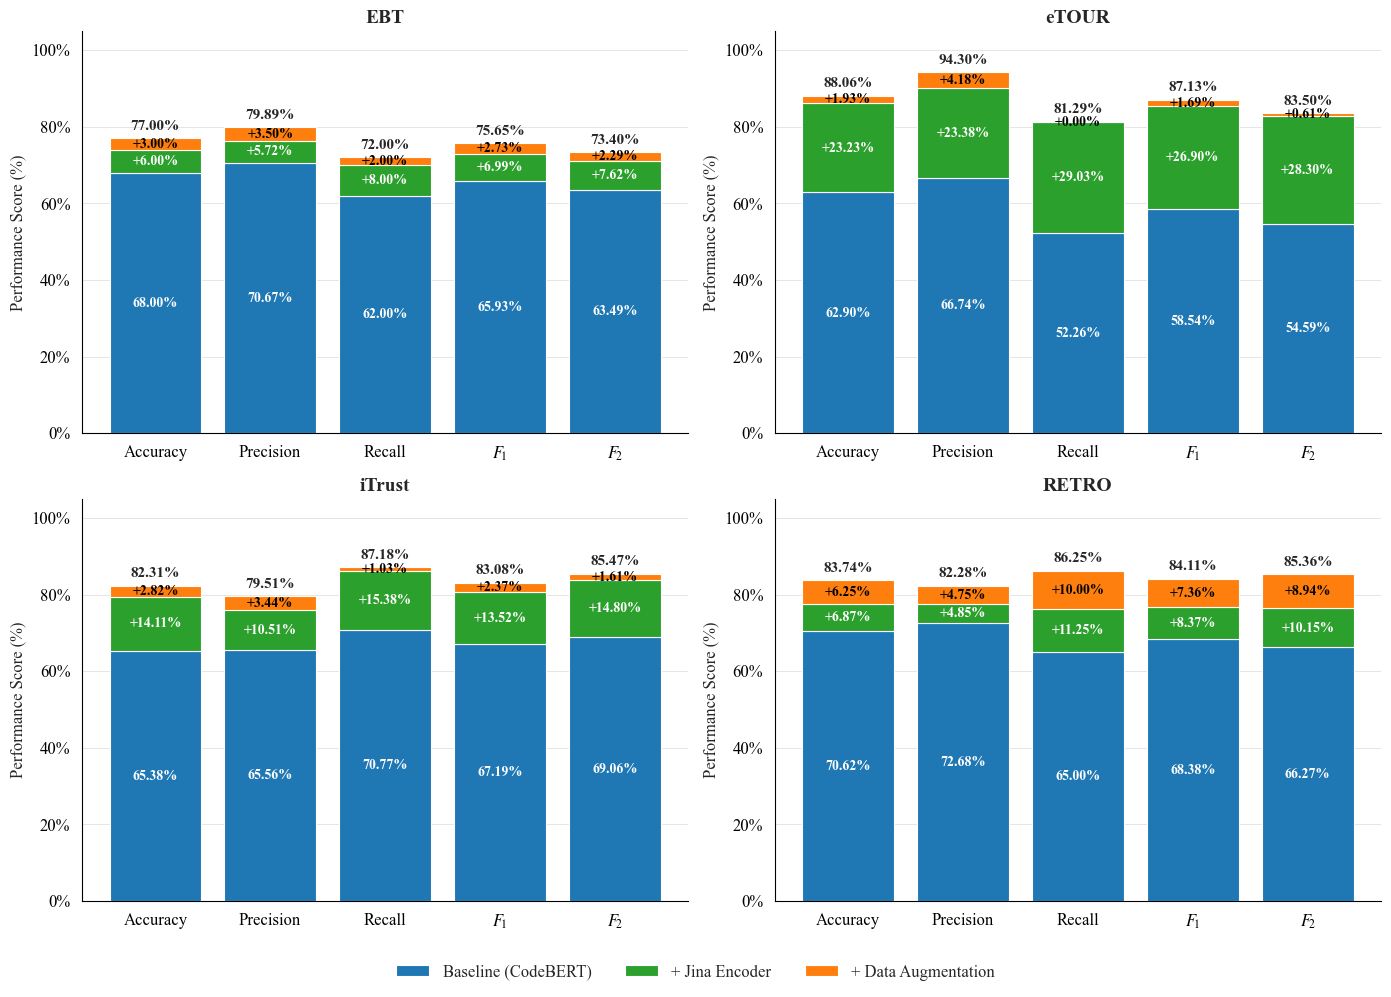

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import font_manager


# ==============================================================================
# A. 字体：注册 Times New Roman（Kaggle: 需先把 ttf 作为 Dataset 上传到 /kaggle/input/times-fonts/）
# ==============================================================================
tnr_candidates = [
    "/kaggle/input/times-fonts/Times New Roman.ttf",
    "/kaggle/input/times-fonts/Times New Roman Bold.ttf",
    "/kaggle/input/times-fonts/Times New Roman Italic.ttf",
    "/kaggle/input/times-fonts/Times New Roman Bold Italic.ttf",
]
for p in tnr_candidates:
    try:
        font_manager.fontManager.addfont(p)
    except Exception:
        pass  # 缺哪个样式不致命

# 统一 rc（正文 + 数学）；把 rc 交给 seaborn，避免其覆盖
base_rc = {
    'font.family': 'Times New Roman',   # 正文字体
    'mathtext.fontset': 'stix',         # 数学接近 Times 风格
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
}
sns.set_theme(context='paper', style='whitegrid', rc=base_rc)

# ==============================================================================
# 1. 模拟数据 (Mock Data)
# ==============================================================================
data = {
    'Dataset': ['EBT']*5 + ['eTOUR']*5 + ['iTrust']*5 + ['RETRO']*5,
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1', 'F2'] * 4,
    'Baseline_Score': [
        68.00, 70.67, 62.00, 65.93, 63.49, # EBT
        62.90, 66.74, 52.26, 58.54, 54.59, # eTOUR
        65.38, 65.56, 70.77, 67.19, 69.06, # iTrust
        70.62, 72.68, 65.00, 68.38, 66.27  # RETRO
    ],
    'Aug_Gain': [6.0, 5.72, 8.0, 6.99, 7.62, 
                 23.23, 23.38, 29.03, 26.9, 28.3, 
                 14.11, 10.51, 15.38, 13.52, 14.8, 
                 6.87, 4.85, 11.25, 8.37, 10.15
    ],
    'Jina_Gain': [3.0, 3.5, 2.0, 2.73, 2.29, 
                  1.93, 4.18, 0.0, 1.69, 0.61, 
                  2.82, 3.44, 1.03, 2.37, 1.61,
                  6.25, 4.75, 10.0, 7.36, 8.94
    ]
}
df = pd.DataFrame(data)

# ==============================================================================
# 2. 绘图设置 (Plotting Setup)
# ==============================================================================
# 创建一个2x2的子图网格
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # 将2x2的axes数组扁平化，方便遍历

# 定义配色方案和图例标签
# 蓝：'#1f77b4'
# 橙: '#ff7f0e'
# 绿: '#2ca02c'
colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] # 稳重的蓝、橙、绿
labels = ['Baseline (CodeBERT)', '+ Jina Encoder', '+ Data Augmentation']
datasets = df['Dataset'].unique()

# X 轴指标固定顺序；并将 F1/F2 转换为 mathtext 以显示下标
metric_order = ['Accuracy', 'Precision', 'Recall', 'F1', 'F2']
metric_labels = [r'Accuracy', r'Precision', r'Recall', r'$F_{\!1}$', r'$F_{\!2}$']
x_pos = np.arange(len(metric_order))

# ==============================================================================
# 3. 遍历数据集并绘制子图
# ==============================================================================
for i, dataset_name in enumerate(datasets):
    ax = axes[i]
    dataset_df = df[df['Dataset'] == dataset_name].set_index('Metric').loc[metric_order].reset_index()

    # 提取三层数据
    baseline = dataset_df['Baseline_Score'].to_numpy()
    aug_gain = dataset_df['Aug_Gain'].to_numpy()
    jina_gain = dataset_df['Jina_Gain'].to_numpy()

    # 绘制堆叠柱状图
    bar1 = ax.bar(x_pos, baseline, color=colors[0], edgecolor='white', label=labels[0])
    bar2 = ax.bar(x_pos, aug_gain, bottom=baseline, color=colors[2], edgecolor='white', label=labels[1])
    bar3 = ax.bar(x_pos, jina_gain, bottom=baseline + aug_gain, color=colors[1], edgecolor='white', label=labels[2])

    # 添加数据标签 (总值和增量)
    for j in range(len(x_pos)):
        baseline_val = float(baseline[j])
        aug_total = baseline_val + float(aug_gain[j])
        jina_total = aug_total + float(jina_gain[j])

        # 在柱子顶端标注最终总值
        ax.text(x_pos[j], jina_total + 1.5, f'{jina_total:.2f}%', ha='center', va='bottom', fontsize=11, weight='bold')

        # 在基线柱块中间标注其数值
        ax.text(x_pos[j], baseline_val / 2, f'{baseline_val:.2f}%', ha='center', va='center', color='white', fontsize=10, weight='bold')

        # 在增量部分中间标注增量值
        ax.text(x_pos[j], baseline_val + float(aug_gain[j]) / 2, f'+{aug_gain[j]:.2f}%', ha='center', va='center', color='white', fontsize=10, weight='bold')
        ax.text(x_pos[j], aug_total + float(jina_gain[j]) / 2, f'+{jina_gain[j]:.2f}%', ha='center', va='center', color='black', fontsize=10, weight='bold')

    # 子图标题
    ax.set_title(dataset_name, fontsize=14, weight='bold')

    # 轴设置
    ax.set_ylim(0, 105)
    ax.set_ylabel('Performance Score (%)', fontsize=12)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))

    ax.set_xticks(x_pos)
    ax.set_xticklabels(metric_labels, fontsize=12)

    # 去除上/右边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ✅ 保持坐标轴是黑色
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color('black')
        ax.spines[spine].set_linewidth(0.8)
    ax.tick_params(axis='both', colors='black')

    # ✅ 只加浅灰色网格线（在柱子后面）
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, linestyle='-', linewidth=0.6, color='#d9d9d9', alpha=0.8)
    ax.xaxis.grid(False)
   
# 统一图例（放在底部）
fig.legend(handles=[bar1, bar2, bar3], labels=labels,
           loc='lower center', bbox_to_anchor=(0.5, 0), ncol=3, frameon=False, fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 1])

# 保存图表
plt.savefig('Figure_12_revised.png', dpi=300, bbox_inches='tight')
plt.savefig('Figure_12_revised.pdf', bbox_inches='tight')

plt.show()


### 3. 请将模拟数据替换为Figure 13所需数据

增加精确的数据标签，直接标注差值。

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import font_manager

# ==============================================================================
# A. 字体：注册 Times New Roman（Kaggle 需先上传 ttf 到 /kaggle/input/times-fonts/）
# ==============================================================================
tnr_candidates = [
    "/kaggle/input/times-fonts/Times New Roman.ttf",
    "/kaggle/input/times-fonts/Times New Roman Bold.ttf",
    "/kaggle/input/times-fonts/Times New Roman Italic.ttf",
    "/kaggle/input/times-fonts/Times New Roman Bold Italic.ttf",
]
for p in tnr_candidates:
    try:
        font_manager.fontManager.addfont(p)
    except Exception:
        pass  # 缺某个样式不影响运行

# 统一 rc（正文 + 数学）。把 rc 放进 seaborn，避免其覆盖。
base_rc = {
    'font.family': 'Times New Roman',   # 正文
    'mathtext.fontset': 'stix',         # 数学采用 STIX（Times 风格）
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    # 输出到 PDF/PNG 时尽量保持可编辑/清晰
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
}
sns.set_theme(context='paper', style='whitegrid', rc=base_rc)

# ==============================================================================
# 1. 模拟数据 (0-100)
# ==============================================================================
data = {
    'Dataset': ['EBT']*5 + ['eTOUR']*5 + ['iTrust']*5 + ['RETRO']*5,
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1', 'F2'] * 4,
    'Score_512': [
        77.0, 79.9, 72.0, 75.7, 73.4,   # EBT
        88.1, 94.3, 81.3, 87.1, 83.5,   # eTOUR
        82.3, 79.5, 87.2, 83.1, 85.5,   # iTrust
        83.8, 82.3, 86.3, 84.1, 85.4    # RETRO
    ],
    'Score_1024': [
        75.0, 78.0, 70.0, 73.5, 71.2,   # EBT
        87.0, 89.0, 80.0, 86.0, 82.3,   # eTOUR
        84.5, 81.2, 88.9, 85.0, 87.1,   # iTrust
        86.1, 84.0, 92.5, 86.5, 89.0    # RETRO
    ]
}
df = pd.DataFrame(data)

# ==============================================================================
# 2. 绘图设置
# ==============================================================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# 颜色与图例
# 蓝：'#1f77b4'
# 橙: '#ff7f0e'
# 绿: '#2ca02c'
colors = ['#1f77b4', '#ff7f0e']
labels = ['Max Sequence Length: 512', 'Max Sequence Length: 1024']
datasets = df['Dataset'].unique()

# 统一的指标顺序与显示标签（F1/F2 用下标）
metric_order  = ['Accuracy', 'Precision', 'Recall', 'F1', 'F2']
metric_labels = [r'Accuracy', r'Precision', r'Recall', r'$F_{\!1}$', r'$F_{\!2}$']
x_pos = np.arange(len(metric_order))
width = 0.35

# ==============================================================================
# 3. 遍历数据集并绘制子图
# ==============================================================================
for i, dataset_name in enumerate(datasets):
    ax = axes[i]
    # 确保每个子图的 x 顺序一致
    dataset_df = (
        df[df['Dataset'] == dataset_name]
        .set_index('Metric')
        .loc[metric_order]
        .reset_index()
    )

    scores_512  = dataset_df['Score_512'].to_numpy()
    scores_1024 = dataset_df['Score_1024'].to_numpy()

    bar1 = ax.bar(x_pos - width/2, scores_512,  width, color=colors[0], label=labels[0])
    bar2 = ax.bar(x_pos + width/2, scores_1024, width, color=colors[1], label=labels[1])

    # 顶端数值标签
    ax.bar_label(bar1, fmt='%.2f', padding=3, fontsize=9)
    ax.bar_label(bar2, fmt='%.2f', padding=3, fontsize=9)

    # 两柱之间的差值（1024 - 512）
    for j in range(len(x_pos)):
        val_512 = float(scores_512[j])
        val_1024 = float(scores_1024[j])
        difference = val_1024 - val_512
        diff_text = f'+{difference:.2f}' if difference >= 0 else f'{difference:.2f}'

        y_pos_line = max(val_512, val_1024) + 7
        y_pos_text = y_pos_line + 2.5
        ax.plot([x_pos[j] - width/2, x_pos[j] + width/2], [y_pos_line, y_pos_line],
                color='black', lw=0.8)
        ax.text(x_pos[j], y_pos_text, diff_text, ha='center', va='center',
                color='black', fontsize=10, weight='bold')

    # 子图标题
    ax.set_title(dataset_name, fontsize=14, weight='bold')

    # 轴设置
    ax.set_ylim(0, 115)
    if i % 2 == 0:  # 左侧子图加 Y 轴标签
        ax.set_ylabel('Performance Score (%)', fontsize=12)

    ax.set_xticks(x_pos)
    ax.set_xticklabels(metric_labels, fontsize=12, rotation=10)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ✅ 保持坐标轴是黑色
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color('black')
        ax.spines[spine].set_linewidth(0.8)
    ax.tick_params(axis='both', colors='black')

    # ✅ 只加浅灰色网格线（在柱子后面）
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, linestyle='-', linewidth=0.6, color='#d9d9d9', alpha=0.8)
    ax.xaxis.grid(False)

# 统一图例
fig.legend(handles=[bar1, bar2], labels=labels,
           loc='lower center', bbox_to_anchor=(0.5, 0), ncol=2, frameon=False, fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 1])

# 保存与显示
plt.savefig('Figure_13_final_revised.png', dpi=300, bbox_inches='tight')
plt.savefig('Figure_13_final_revised.pdf', bbox_inches='tight')
plt.show()

### 4. 从Figure8-Figure11中找出最小值和最大值替换下面的min和max

对于每个数据集，读者最关心的不是80个具体的p值，而是一个问题：“在所有的对比中，最小的p值是多少？它是否小于0.05？”。用一个统一的表格，替代所有四张热力图，这样可以**节省版面、高效传递核心信息（没有显著差异）**。

```latex
\begin{table}[h!]
\centering
\caption{Summary of p-value Ranges from Pairwise LLM Comparisons Across All Datasets. The range reflects the minimum and maximum p-values observed across all metrics and prompting strategies for each dataset.}
\label{tab:p_value_summary}
\begin{tabular}{lc}
\toprule
\textbf{Dataset} & \textbf{Range of p-values (min -- max)} \\
\midrule
EBT        & [$min$ -- $max$] \\
eTOUR      & [$min$ -- $max$] \\
iTrust     & [$min$ -- $max$] \\
RETRO.NET  & [$min$ -- $max$] \\
\bottomrule
\end{tabular}
\end{table}
```

### 5. 用Table 4和Table 5中的数据替换下面代码中的数据

散点对比图形式呈现结果更加直观，把Table 4和Table 5放到附录中即可。

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ==============================================================================
# 1. 数据准备 (Data Preparation)
# 我已根据您上传的Table 3和Table 4录入了全部三个指标的数据。
# ==============================================================================
data = {
    'Dataset': ['EBT']*11 + ['eTOUR']*11 + ['iTrust']*11 + ['RETRO']*11,
    'Method': ['LDA', 'LSI', 'VSM', 'KNN', 'LR', 'SVM', 'GRU', 'LSTM', 'Bi-GRU', 'Bi-LSTM', 'Ours']*4,
    'Category': ['IR', 'IR', 'IR', 'ML', 'ML', 'ML', 'DL', 'DL', 'DL', 'DL', 'Ours']*4,
    'Accuracy': [
        35.00, 75.00, 60.00, 65.00, 70.00, 75.00, 50.00, 50.00, 50.00, 50.00, 77.00, # EBT
        51.61, 50.00, 70.97, 53.23, 56.45, 54.84, 46.77, 50.00, 46.77, 47.74, 88.06, # eTOUR
        53.85, 61.54, 69.23, 58.97, 58.97, 64.10, 52.31, 52.56, 49.49, 52.31, 82.31, # iTrust
        43.75, 53.13, 59.38, 65.63, 71.88, 68.75, 47.50, 47.50, 46.88, 46.88, 83.75  # RETRO
    ],
    'F1_Score': [
        43.48, 73.68, 55.56, 63.16, 70.00, 73.68, 13.33, 26.67, 13.33, 26.67, 75.65, # EBT
        16.67, 50.79, 64.00, 53.97, 57.14, 54.84, 60.23, 47.75, 58.67, 60.89, 87.13, # eTOUR
        25.00, 59.46, 60.00, 60.00, 60.98, 64.10, 10.84, 11.21, 1.78, 13.20, 83.08,  # iTrust
        10.00, 54.55, 51.85, 70.27, 72.73, 68.75, 39.63, 35.89, 37.04, 28.62, 84.11   # RETRO
    ],
    'F2_Score': [
        47.17, 71.43, 52.08, 61.22, 70.00, 71.43, 16.67, 33.33, 16.67, 33.33, 73.40, # EBT
        11.63, 51.28, 55.94, 54.49, 57.69, 54.84, 71.48, 56.19, 68.44, 72.37, 83.50, # eTOUR
        18.18, 57.59, 50.85, 60.91, 62.81, 64.10, 7.88, 8.37, 1.23, 9.23, 85.47,    # iTrust
        7.35, 55.56, 46.67, 76.47, 74.07, 68.75, 36.67, 37.53, 33.33, 25.48, 85.36     # RETRO
    ]
}
df = pd.DataFrame(data)

# ==============================================================================
# 2. 绘图设置 (Plotting Setup)
# ==============================================================================

tnr_candidates = [
    "/kaggle/input/times-fonts/Times New Roman.ttf",
    "/kaggle/input/times-fonts/Times New Roman Bold.ttf",
    "/kaggle/input/times-fonts/Times New Roman Italic.ttf",
    "/kaggle/input/times-fonts/Times New Roman Bold Italic.ttf",
]
for p in tnr_candidates:
    try:
        font_manager.fontManager.addfont(p)
    except Exception:
        pass  # 缺某个样式不影响运行

# 统一 rc（正文 + 数学）。把 rc 放进 seaborn，避免其覆盖。
base_rc = {
    'font.family': 'Times New Roman',   # 正文
    'mathtext.fontset': 'stix',         # 数学采用 STIX（Times 风格）
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    # 输出到 PDF/PNG 时尽量保持可编辑/清晰
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
}
sns.set_theme(context='paper', style='whitegrid', rc=base_rc)


# 创建一个3x1的子图网格，并共享X和Y轴以保持一致性
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=True)

# 蓝：'#1f77b4'
# 橙: '#ff7f0e'
# 绿: '#2ca02c'

# 定义数据集Y轴顺序、颜色、形状和大小映射
dataset_order = ['eTOUR', 'RETRO', 'iTrust', 'EBT']
df['Dataset'] = pd.Categorical(df['Dataset'], categories=dataset_order, ordered=True)
color_map = {'Ours': '#d62728', 'IR': '#1f77b4', 'ML': '#2ca02c', 'DL': '#ff7f0e'}
shape_map = {'Ours': '*', 'IR': 'o', 'ML': 's', 'DL': '^'}
size_map = {'Ours': 200, 'IR': 80, 'ML': 80, 'DL': 80}
category_order = ['Ours', 'ML', 'IR', 'DL']

# ==============================================================================
# 3. 遍历三个指标并绘制子图
# ==============================================================================
metrics_to_plot = [
    ('Accuracy', '(a) Accuracy'),
    ('F1_Score', '(b) $F_1$ Score'),
    ('F2_Score', '(c) $F_2$ Score')
]

for i, (metric_col, title) in enumerate(metrics_to_plot):
    ax = axes[i]
    
    # 绘制散点对比图
    sns.scatterplot(
        data=df,
        x=metric_col,
        y='Dataset',
        hue='Category',
        hue_order=category_order,
        style='Category',
        style_order=category_order,
        size='Category',
        size_order=category_order,
        palette=color_map,
        markers=shape_map,
        sizes=size_map,
        edgecolor='black',
        alpha=0.8,
        ax=ax
    )
    
    # 设置子图标题和轴标签
    ax.set_title(title, fontsize=16, weight='bold')
    ax.set_ylabel('Dataset', fontsize=14)
    # X轴标签只在最下方的图显示
    if i == len(metrics_to_plot) - 1:
        ax.set_xlabel('Performance Score (%)', fontsize=14)
    else:
        ax.set_xlabel('')
        
    # 隐藏每个子图自己的图例
    ax.get_legend().remove()

# ==============================================================================
# 4. 全局美化与调整 (Final Touches)
# ==============================================================================
# 调整所有子图的通用样式
for ax in axes:
    ax.set_xlim(0, 100)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # ✅ 保持坐标轴是黑色
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color('black')
        ax.spines[spine].set_linewidth(0.8)
    ax.tick_params(axis='both', colors='black')

    # ✅ 只加浅灰色网格线（在柱子后面）
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, linestyle='-', linewidth=1, color='#d9d9d9', alpha=1)
    ax.xaxis.grid(False)
    
# 创建一个统一的全局图例
handles, labels = axes[0].get_legend_handles_labels() # 从任意一个子图获取图例信息
legend = fig.legend(
    handles=handles,
    labels=['Our Model (LLM-Trace)', 'ML Baselines', 'IR Baselines', 'DL Baselines'],
    loc='lower center',
    bbox_to_anchor=(0.5, 0),
    ncol=4, # 4列显示
    frameon=False,
    fontsize=13
)

# 调整布局，为底部的图例留出空间
plt.tight_layout(rect=[0, 0.05, 1, 1])

fig.subplots_adjust(hspace=0.3)  # 0.25~0.35 之间都属于“稍微增大”

plt.savefig('Figure_Benchmark_Comparison_All_Metrics.png', dpi=300, bbox_inches='tight')
plt.savefig('Figure_Benchmark_Comparison_All_Metrics.pdf', bbox_inches='tight')

plt.show()